In [1]:
import warnings
warnings.filterwarnings("ignore")

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv("KNN_Project_Data.csv")
df.head()

XVPM         GWYH         TRAT        TLLZ         IGGA  \
0  1636.670614   817.988525  2565.995189  358.347163   550.417491   
1  1013.402760   577.587332  2644.141273  280.428203  1161.873391   
2  1300.035501   820.518697  2025.854469  525.562292   922.206261   
3  1059.347542  1066.866418   612.000041  480.827789   419.467495   
4  1018.340526  1313.679056   950.622661  724.742174   843.065903   

          HYKR         EDFS        GUUB         MGJM         JHZC  \
0  1618.870897  2147.641254  330.727893  1494.878631   845.136088   
1  2084.107872   853.404981  447.157619  1193.032521   861.081809   
2  2552.355407   818.676686  845.491492  1968.367513  1647.186291   
3   685.666983   852.867810  341.664784  1154.391368  1450.935357   
4  1370.554164   905.469453  658.118202   539.459350  1899.850792   

   TARGET CLASS  
0             0  
1             1  
2             1  
3             0  
4             0

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   XVPM          1000 non-null   float64
 1   GWYH          1000 non-null   float64
 2   TRAT          1000 non-null   float64
 3   TLLZ          1000 non-null   float64
 4   IGGA          1000 non-null   float64
 5   HYKR          1000 non-null   float64
 6   EDFS          1000 non-null   float64
 7   GUUB          1000 non-null   float64
 8   MGJM          1000 non-null   float64
 9   JHZC          1000 non-null   float64
 10  TARGET CLASS  1000 non-null   int64  
dtypes: float64(10), int64(1)
memory usage: 86.1 KB


In [5]:
df.describe()

XVPM         GWYH         TRAT         TLLZ         IGGA  \
count  1000.000000  1000.000000  1000.000000  1000.000000  1000.000000   
mean   1055.071157   991.851567  1529.373525   495.107156   940.590072   
std     370.980193   392.278890   640.286092   142.789188   345.923136   
min      21.170000    21.720000    31.800000     8.450000    17.930000   
25%     767.413366   694.859326  1062.600806   401.788135   700.763295   
50%    1045.904805   978.355081  1522.507269   500.197421   939.348662   
75%    1326.065178  1275.528770  1991.128626   600.525709  1182.578166   
max    2117.000000  2172.000000  3180.000000   845.000000  1793.000000   

              HYKR         EDFS         GUUB         MGJM         JHZC  \
count  1000.000000  1000.000000  1000.000000  1000.000000  1000.000000   
mean   1550.637455  1561.003252   561.346117  1089.067338  1452.521629   
std     493.491988   598.608517   247.357552   402.666953   568.132005   
min      27.930000    31.960000    13.520000    23.210000    30.890000   
25%    1219.267077  1132.097865   381.704293   801.849802  1059.499689   
50%    1564.996551  1565.882879   540.420379  1099.087954  1441.554053   
75%    1891.937040  1981.739411   725.762027  1369.923665  1864.405512   
max    2793.000000  3196.000000  1352.000000  2321.000000  3089.000000   

       TARGET CLASS  
count    1000.00000  
mean        0.50000  
std         0.50025  
min         0.00000  
25%         0.00000  
50%         0.50000  
75%         1.00000  
max         1.00000

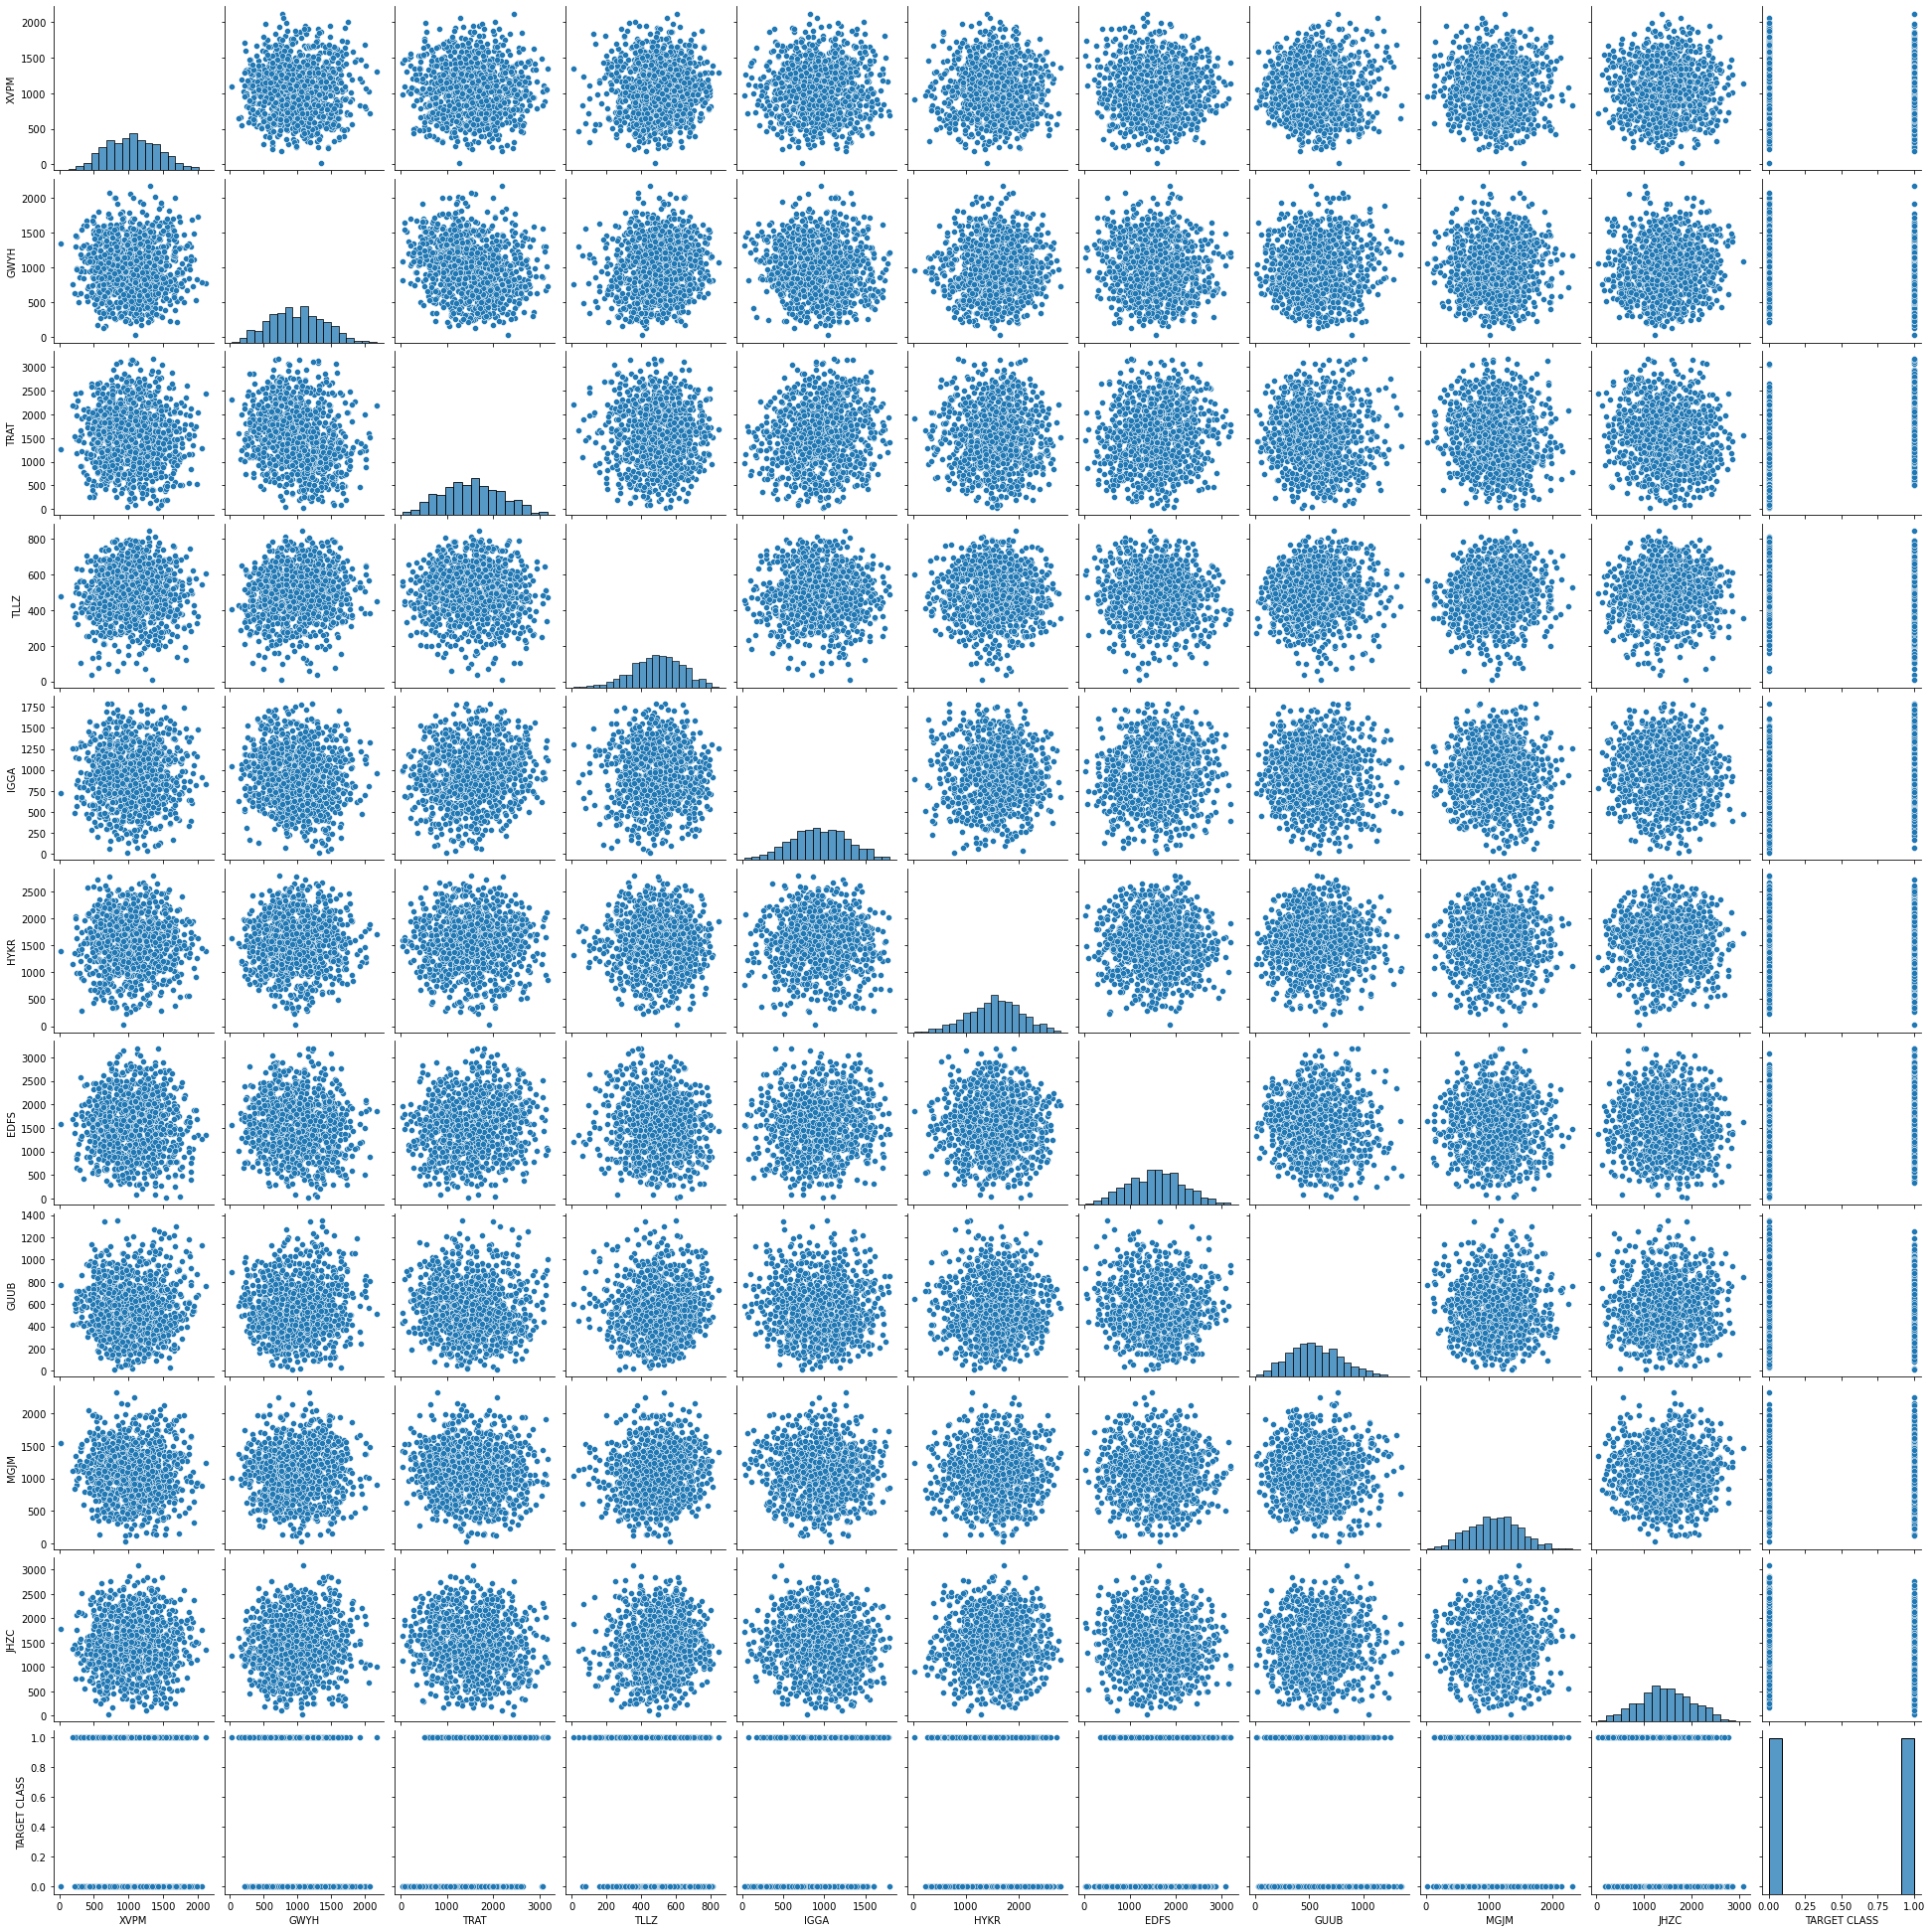

In [6]:
sns.pairplot(df)

All the columns are almost normally distributed

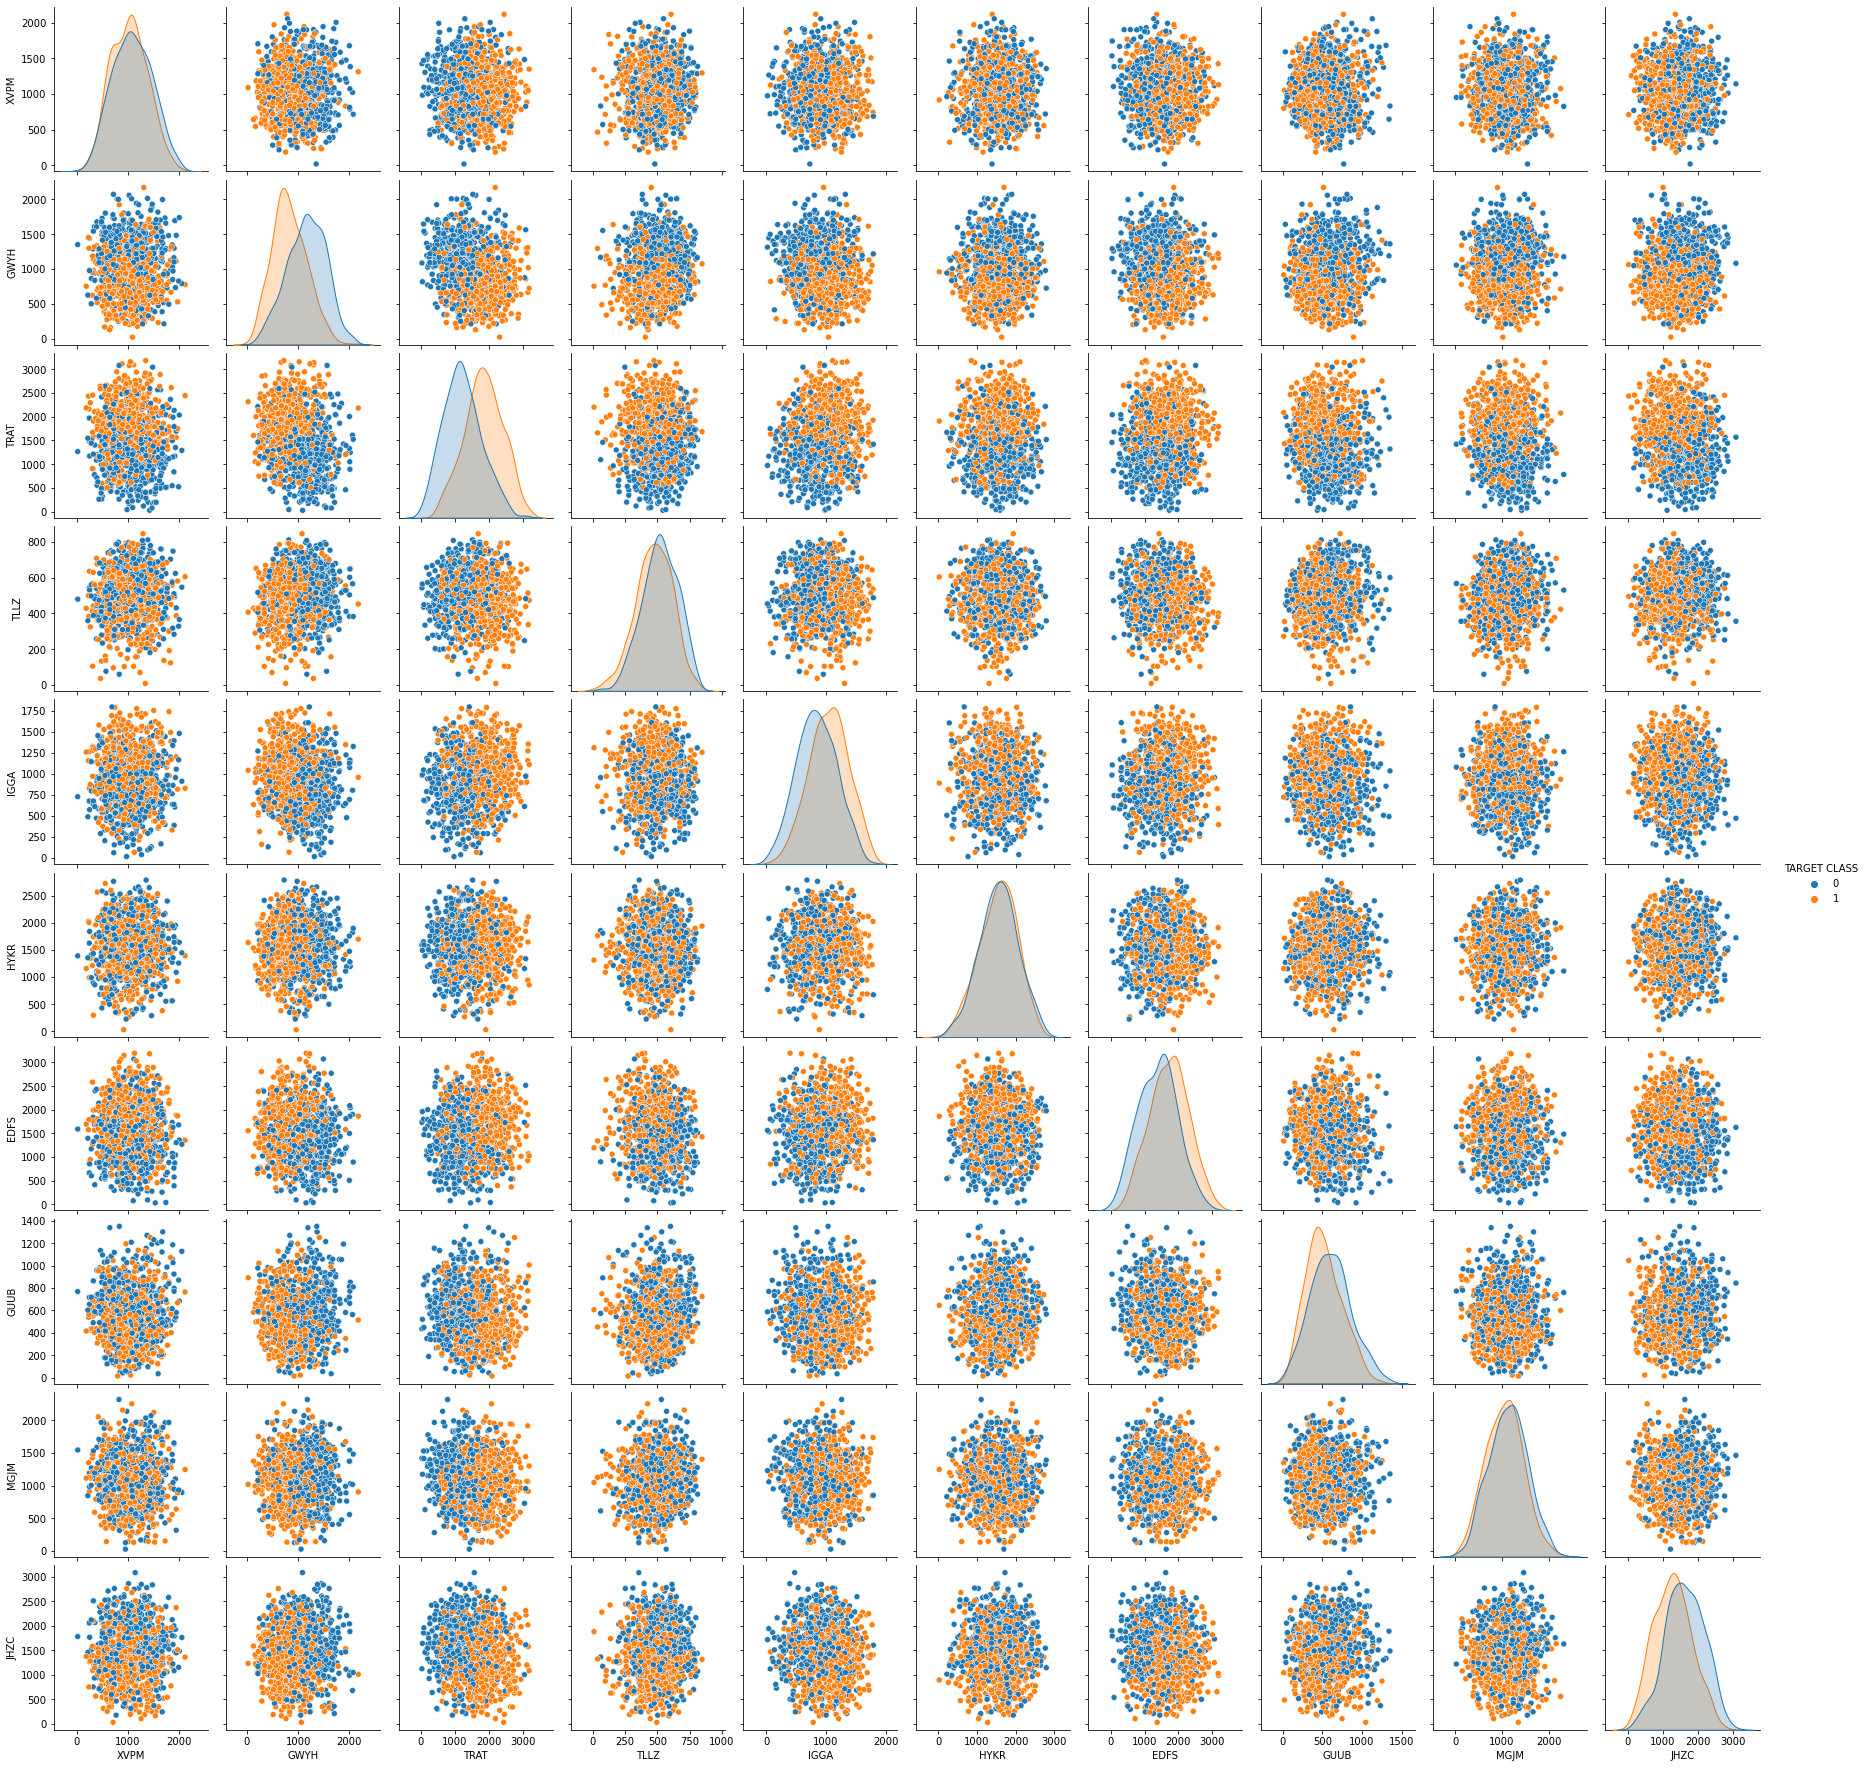

In [7]:
sns.pairplot(df, hue="TARGET CLASS")

In [10]:
x = df.iloc[:, :-1]
y = df.iloc[:, -1]

Splitting the data into Train & Test

In [90]:
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(x,y, test_size=0.30, random_state=1)

Building KNN Model

In [91]:
#Step1 : import the model
from sklearn.neighbors import KNeighborsClassifier

#Step2 : create the object
knn = KNeighborsClassifier(n_neighbors=6)

#Step3 : train the model
knn.fit(xtrain,ytrain)

#Step4 : make prediction
ypred = knn.predict(xtest)

In [92]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
ac= accuracy_score(ytest, ypred)
cm = confusion_matrix(ytest, ypred)
cr = classification_report(ytest, ypred)

print(f"Accuracy : {ac}\n{cm}\n{cr}")

Accuracy : 0.78
[[137  21]
 [ 45  97]]
              precision    recall  f1-score   support

           0       0.75      0.87      0.81       158
           1       0.82      0.68      0.75       142

    accuracy                           0.78       300
   macro avg       0.79      0.78      0.78       300
weighted avg       0.79      0.78      0.78       300



In [93]:
train = knn.score(xtrain,ytrain)
test = knn.score(xtest,ytest)

print(f"Training Accuracy : {train}\nTesting Accuracy : {test}")

Training Accuracy : 0.85
Testing Accuracy : 0.78


HYPERPARAMETER TUINING

In [98]:
trainac = []
testac = []

for i in range(1,20):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(xtrain,ytrain)
    
    train = knn.score(xtrain,ytrain)
    test = knn.score(xtest,ytest)
    
    trainac.append(train)
    testac.append(test)

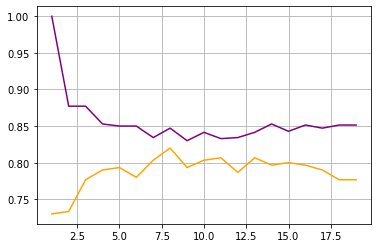

In [99]:
plt.plot(range(1,20),trainac, color = "purple")
plt.plot(range(1,20),testac,color = "orange")
plt.grid()

In [100]:
#Step2 : create the object
knn = KNeighborsClassifier(n_neighbors=8)

#Step3 : train the model
knn.fit(xtrain,ytrain)

#Step4 : make prediction
ypred = knn.predict(xtest)

In [101]:
ac= accuracy_score(ytest, ypred)
cm = confusion_matrix(ytest, ypred)
cr = classification_report(ytest, ypred)

print(f"Accuracy : {ac}\n{cm}\n{cr}")

Accuracy : 0.82
[[141  17]
 [ 37 105]]
              precision    recall  f1-score   support

           0       0.79      0.89      0.84       158
           1       0.86      0.74      0.80       142

    accuracy                           0.82       300
   macro avg       0.83      0.82      0.82       300
weighted avg       0.82      0.82      0.82       300



In [104]:
def target():
    a = float(input("XVPM : "))
    b = float(input("GWYH : "))
    c = float(input("TRAT : "))
    d = float(input("TLLZ : "))
    e = float(input("IGGA : "))
    f = float(input("HYKR : "))
    g = float(input("EDFS : "))
    h = float(input("GUUB : "))
    i = float(input("MGJM : "))
    j = float(input("JHZC : "))
    newob = [[a,b,c,d,e,f,g,h,i,j]]
    yp = knn.predict(newob)[0]
    
    if(yp == 1):
        print("Yes")
    else:
        print("No")
    return yp    

In [105]:
target()

XVPM : 3000
GWYH : 222
TRAT : 222
TLLZ : 2111
IGGA : 1111
HYKR : 2222
EDFS : 33333
GUUB : 3333
MGJM : 4444
JHZC : 4444
Yes


1